In [2]:
import pandas as pd 
import numpy as np 
import random

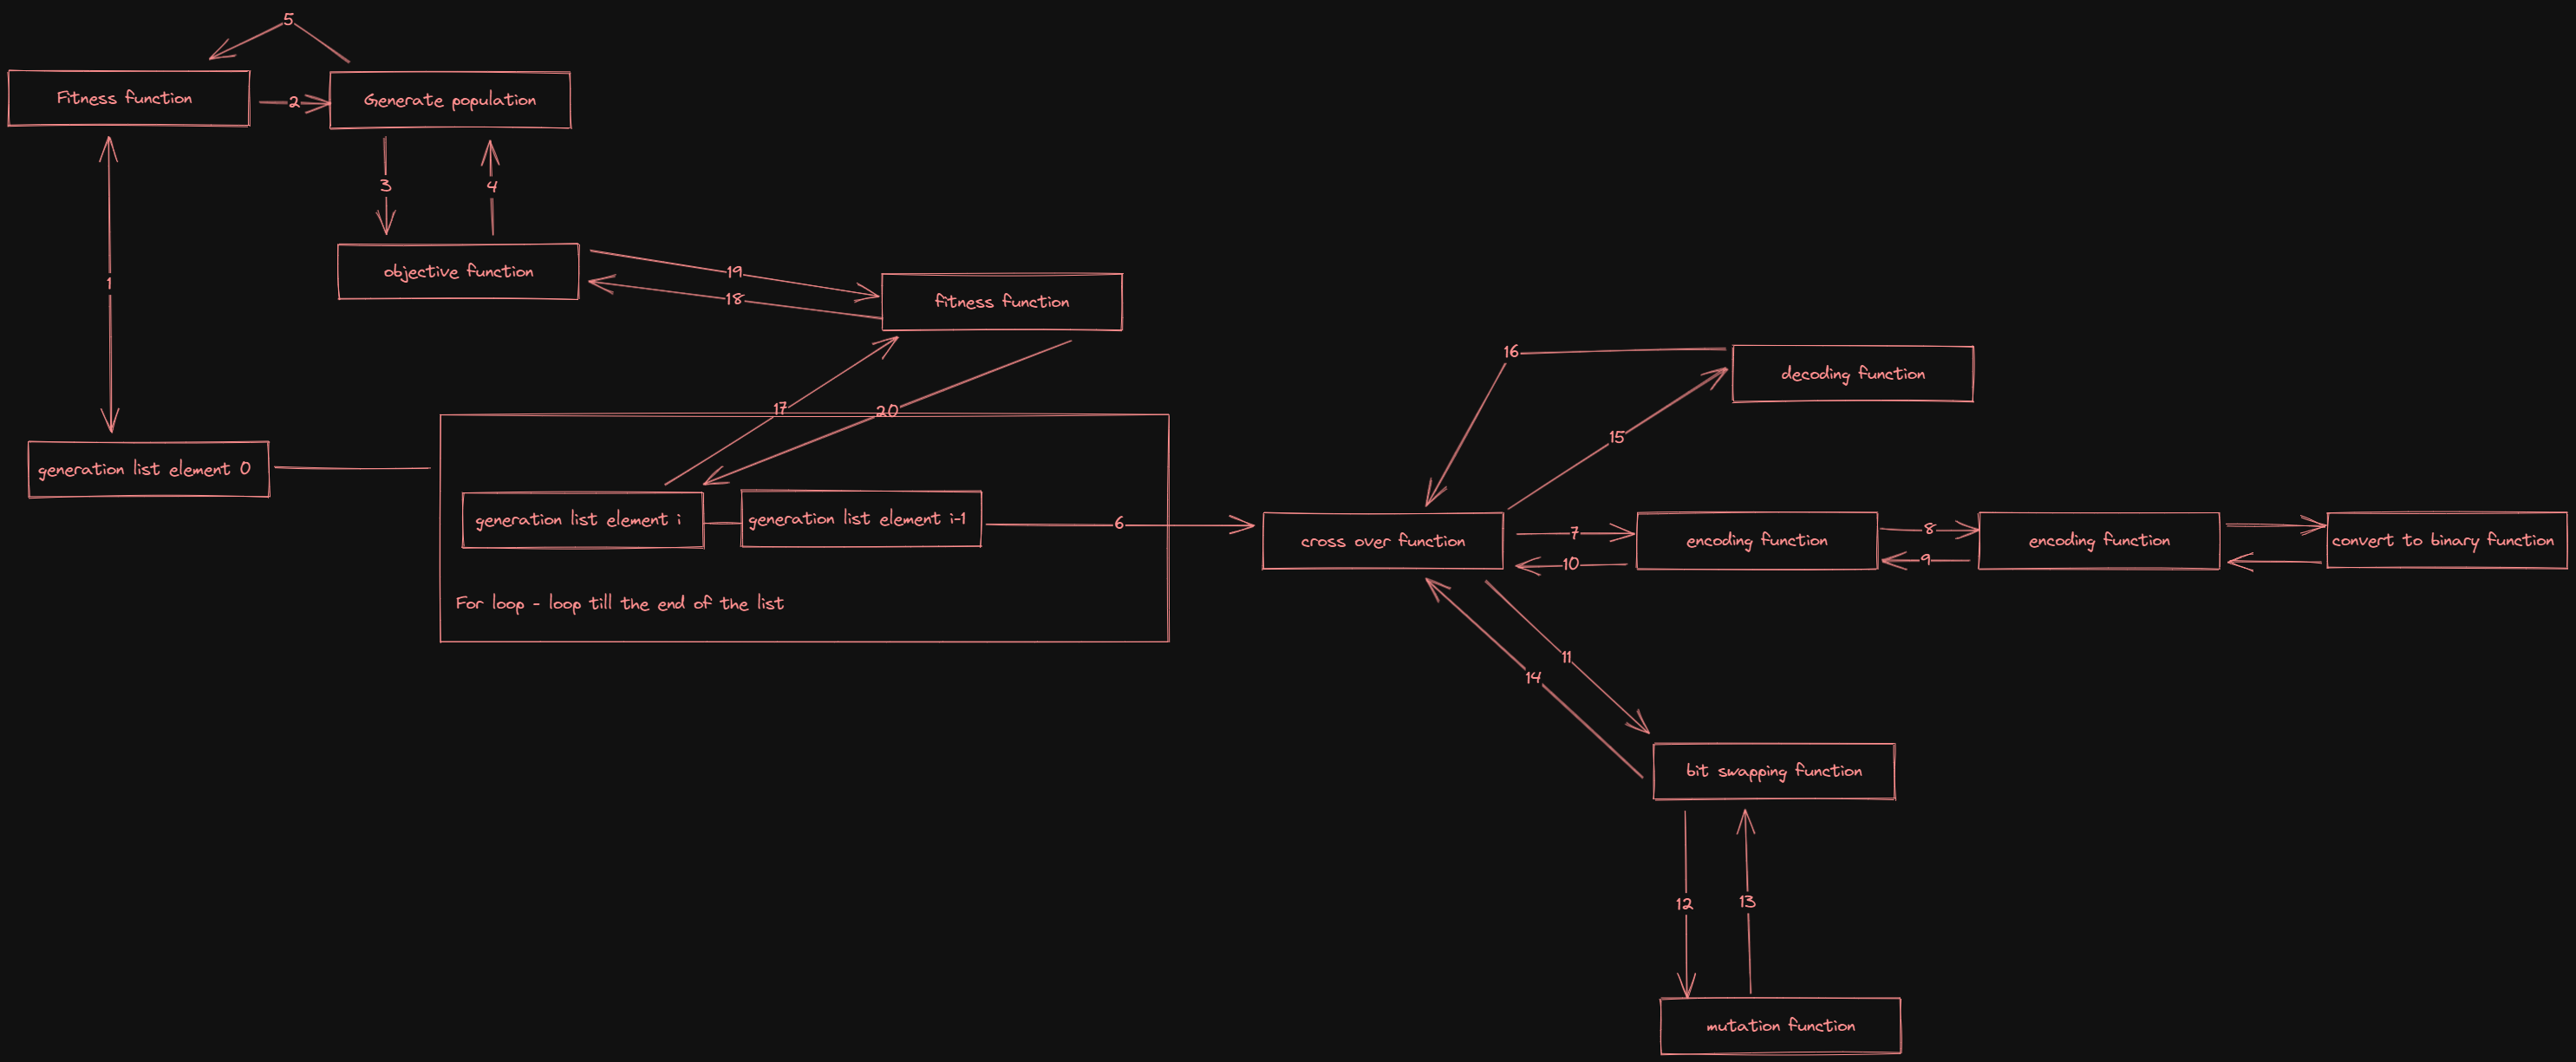

In [3]:
"""
This function checks if the given values of x, y and z satisfy the condition x+y+z==10 and all of them are greater than 0.

@param x: a numeric value
@param y: a numeric value
@param z: a numeric value
@return: Returns True if the condition is satisfied, False otherwise.
"""

def is_valid_solution(x,y,z):
    if (x+y+z == 10 and x>0 and y> 0 and z>0):
        return True
    else:
        return False

In [119]:

"""
This function performs a mutation on the input child_gene string with a probability of 1/20.
If a mutation occurs, a random bit in the gene is flipped.
Returns the mutated child_gene string or the original child_gene string if no mutation occurs.


"""

def mutaion_function(child_gene):
    
    random_number = random.randint(1 ,10)
    if(random_number == 1):
        # print("Mutation occured !!")
        random_bit = random.randint(1 , len(child_gene))
        child_gene = list(child_gene)
        random_bit = random.randint(0 , len(child_gene)-1)
        if(child_gene[random_bit] == "0"):
            child_gene[random_bit] = "1"
        else:
            child_gene[random_bit] ="0"
        return(''.join(map(str , child_gene)))  
    else:
        return(child_gene)  

In [5]:
"""
This code contains two functions: objective_function and fitness.

The objective_function takes three arguments x, y, and z and returns their product with predefined constants: 20000, 15000, and 17000.

The fitness function takes a DataFrame as an argument, parents_dataframe, which contains
values for x, y, and z. 
The function calculates the fitness value of each record in the DataFrame by:

1- Summing the results of objective_function for each record in the DataFrame. 
This sum is assigned to the variable fitness_total.

2 - Appending a new column, fitness, to the DataFrame.
 
3 - This column is populated with the fitness value of each record, which is calculated by dividing 1 by the 
result of objective_function for each record divided by fitness_total.

4 - Sorting the DataFrame in descending order by the fitness column.
Returning the sorted DataFrame.
"""

def objective_function(x , y , z):
    if (x+y+z == 10 and x>0 and y>0 and z>0):
        
        return (x*20000 + y*15000 + z*17000)
 
    else:
       
        return 0
def fitness(parents_dataframe):

    fitness_total = sum(parents_dataframe.apply(lambda x: objective_function(x['x'],x['y'],x['z']) , axis=1))
    parents_dataframe["fitness"] = parents_dataframe.apply(lambda x : 1/(objective_function(x['x'],x['y'],x['z'])/fitness_total) if (objective_function(x['x'],x['y'],x['z']) > 0) else 0 , axis=1)
  
    parents_dataframe = parents_dataframe[parents_dataframe["fitness"]>0]
    parents_dataframe  = parents_dataframe.sort_values(by=['fitness'] , ascending=False)
    return (parents_dataframe.reset_index(drop=True))


In [6]:
"""
This function generates a population of parent individuals based on a given objective function.

Inputs:
- objective_function: a function that takes three integer inputs (x, y, z) and
returns a boolean indicating whether or not the input values are valid for the population

Output:
- generation: a list of dictionaries containing the x, y, and z values for each 
parent individual in the population
"""
def generate_population():
    
    number_of_parents = 4
    generation =[]
    while (len(generation) < number_of_parents):
        x =(random.randint(1,9))
        y =(random.randint(1,9))
        z =(random.randint(1,9))
        if (is_valid_solution(x , y , z)):
            temp = {
                'x':x,
                'y':y ,
                'z':z
            }
            generation.append(temp)
    
    df = pd.DataFrame(generation)
   
    return df





In [7]:



def convert_to_binary(x):
    return (bin(x)[2:].zfill(4))

def encoding_function(parents_dataframe):
    
    temp_dataframe = parents_dataframe.drop(['fitness' , 'generation'],axis=1)
    column_list = temp_dataframe.columns
    for columns in column_list:
        temp_dataframe[columns]  = temp_dataframe[columns].apply(lambda x : convert_to_binary(x))
    
    return(temp_dataframe)

def decoding_function(x):
    return int(x ,2)
    

In [8]:

def bit_swap_function(parent_column):
    elite_parent_counter = 0 
    parent_counter = 1
    child_list =[]
    while(elite_parent_counter <= len(parent_column)-1):
        elite_parent = parent_column[elite_parent_counter]
        
        for parent in parent_column[parent_counter:]:
            child_one = list(elite_parent)
            child_two = list(parent)
            gene_one = elite_parent[1:3]
            gene_two = parent[1:3]
            child_one[1:3] = gene_two
            child_two[1:3] = gene_one
            child_one = ''.join(map(str , child_one))
            child_two =''.join(map(str , child_two))
            child_one =(mutaion_function(child_one))
            child_two=(mutaion_function(child_two))
            child_list.append(child_one)
            child_list.append(child_two)  
        elite_parent_counter = elite_parent_counter + 1
        parent_counter = parent_counter + 1 
            
   
    # print("child_list --->",child_list)
    return child_list
    

def cross_over_function(parent_dataframe):
    encoded_dataframe = encoding_function(parent_dataframe)
    encoded_dataframe_new = pd.DataFrame()
    for column in encoded_dataframe.columns:
        encoded_dataframe_new[column] = bit_swap_function(list(encoded_dataframe[column]))
    # the rows are arranged in order of the fitness , the top row has the highest fitness
    return encoded_dataframe_new.applymap(decoding_function)
    

In [61]:
start_generation = fitness(generate_population())
start_generation['generation'] =1
print(start_generation)


# new_generation = cross_over_function(start_generation)
# print(new_generation)
# new_generation.drop_duplicates(inplace=True)
# new_generation['generation'] ="Gen_2"
# new_generation['fitness']=''
# new_generation = pd.concat([start_generation , new_generation] , axis=0)
# print((fitness(new_generation)))
# # print(fitness(start_generation , "Gen_2"))

   x  y  z   fitness  generation
0  3  6  1  4.161677           1
1  3  5  2  4.112426           1
2  3  1  6  3.926554           1
3  6  3  1  3.818681           1


In [40]:

# print(fitness(start_generation , "Gen_2"))

    x  y  z
0   3  3  4
1   3  3  4
2   3  1  6
3   3  3  4
4   7  3  0
5   2  3  5
6   3  1  6
7   3  3  4
8   7  3  0
9   2  7  5
10  7  3  0
11  2  1  7
None


,x,y,z,fitness
0,2,3,5,8.229412
1,3,3,4,8.086705
4,2,1,7,8.040230
5,3,1,6,7.903955


In [103]:
def elite_children(generation):
    
    generation_number = generation['generation'].max()
    print(generation_number)
    temp_df = generation[generation['generation'] != generation_number]
    elite_generation = generation.drop(columns="generation")
    elite_generation.drop_duplicates(inplace=True)
    
    if(len(elite_generation) < 4):
        elite_generation['generation'] = generation_number
        elite_generation = pd.concat([temp_df , elite_generation] ,axis=0)
        elite_generation.sort_values(by='fitness' , ascending=False , inplace=True)
        return elite_generation
        
    else:
        elite_generation = elite_generation.head(4)
        elite_generation['generation'] = generation_number
        elite_generation = pd.concat([temp_df , elite_generation] ,axis=0)
        elite_generation.sort_values(by='fitness' ,ascending=False, inplace=True)
        return elite_generation
    
    

In [102]:
new_generation = cross_over_function(start_generation)
# print("this is new generation -->" ,new_generation)
new_generation.drop_duplicates(inplace=True)
new_generation['generation'] =2
new_generation['fitness']=''
new_generation = pd.concat([start_generation , new_generation] , axis=0)
new_generation = fitness(new_generation)
elite_children(new_generation)

,x,y,z,fitness,generation
0,2,7,1,11.734568,2
1,2,5,3,11.451807,2
2,3,6,1,11.383234,1
2,3,6,1,11.383234,2
3,3,5,2,11.248521,1
3,3,5,2,11.248521,2
7,3,1,6,10.740113,1
9,6,3,1,10.445055,1


In [126]:
generation_list = [None]*20
generation_list[0] = (fitness(generate_population()))
generation_list[0]['generation'] =1
fitness_list =''




In [127]:
for i in range(1, len(generation_list)):
    generation_list[i] = cross_over_function(generation_list[i-1])
    
    (generation_list[i]).drop_duplicates(inplace=True)
    generation_list[i]['generation'] =i+1
    generation_list[i]['fitness']=''
    generation_list[i]=pd.concat([generation_list[i-1] ,generation_list[i]] , axis=0)
    generation_list[i] = fitness(generation_list[i])
    generation_list[i] = elite_children(generation_list[i])

output = generation_list[len(generation_list)-1]  

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [128]:
output

,x,y,z,fitness,generation
0,1,7,2,93.000000,12
2,1,7,2,93.000000,18
3,1,7,2,93.000000,14
4,1,7,2,93.000000,13
5,1,7,2,93.000000,19
...,...,...,...,...,...
82,3,5,2,87.497041,4
81,3,5,2,87.497041,5
85,3,4,3,86.473684,1
86,2,1,7,84.982759,1


In [129]:

generation_names =output['generation'].unique()
generation_names
fitness_table = pd.DataFrame({'generation': [], 'fitness_score': []})

for i in generation_names:
    mean_fitness = output[output['generation']==i]['fitness'].mean()
    fitness_table.loc[len(fitness_table)] = [i, mean_fitness]
    
fitness_table.sort_values(by="generation" ,inplace=True)


In [130]:
fitness_table['fitness_score_pct_change'] = fitness_table['fitness_score'].pct_change()

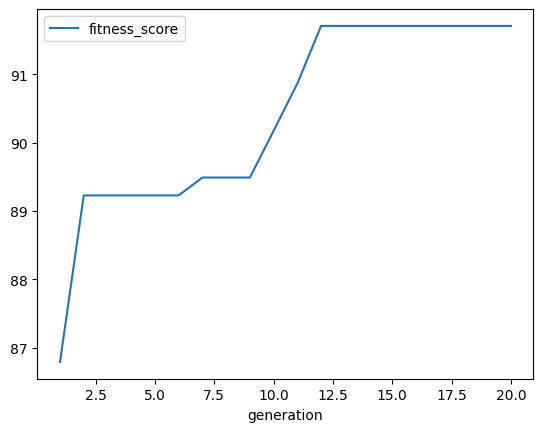

In [131]:
import matplotlib.pyplot as plt

fitness_table.plot(x='generation', y='fitness_score', kind='line')
plt.show()

In [125]:
fitness_table['fitness_score_pct_change'].sum()*100

2.438098620646767

In [111]:
output[output['y']==7].sort_values(by="generation")

,x,y,z,fitness,generation
63,2,7,1,182.592593,10
79,2,7,1,182.592593,11
56,2,7,1,182.592593,12
67,2,7,1,182.592593,13
53,2,7,1,182.592593,14
66,2,7,1,182.592593,15
52,2,7,1,182.592593,16
58,2,7,1,182.592593,17
70,2,7,1,182.592593,18
54,2,7,1,182.592593,19
